<a href="https://colab.research.google.com/github/raunitd/Mini-Project/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime --quiet
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.96 s (started: 2021-06-16 11:40:58 +00:00)


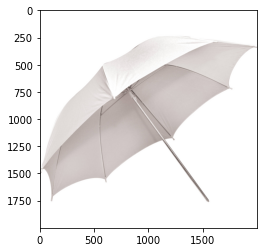

time: 54.4 s (started: 2021-06-16 11:41:01 +00:00)


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/Smartknower - May Batch/Machine Learning/images'
CATEGORIES = ['cars','shoes','umbrella']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data=np.array(flat_data)
target = np.array(target)
images = np.array(images)    

In [ ]:
len(flat_data[0])

67500

time: 4 ms (started: 2021-06-16 11:41:55 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

time: 4.26 ms (started: 2021-06-16 11:41:55 +00:00)


<BarContainer object of 3 artists>

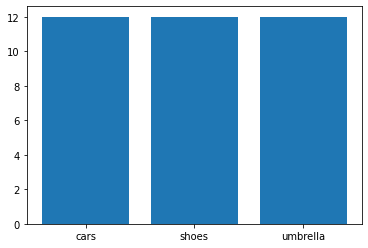

time: 151 ms (started: 2021-06-16 11:41:55 +00:00)


In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size=0.3,random_state=55)

time: 9.95 ms (started: 2021-06-16 11:41:55 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 20.5 s (started: 2021-06-16 11:41:55 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0])

time: 37 ms (started: 2021-06-16 11:42:16 +00:00)


In [ ]:
y_test

array([1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 0])

time: 3.64 ms (started: 2021-06-16 11:42:16 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.26 ms (started: 2021-06-16 11:42:16 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.6363636363636364

time: 4.2 ms (started: 2021-06-16 11:42:16 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[4, 1, 1],
       [1, 1, 0],
       [0, 1, 2]])

time: 4.88 ms (started: 2021-06-16 11:42:16 +00:00)


In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 24.9 ms (started: 2021-06-16 11:42:16 +00:00)


In [ ]:
model = pickle.load(open('img_model.p','rb'))

time: 12 ms (started: 2021-06-16 11:42:16 +00:00)


Enter your URLhttps://imgd.aeplcdn.com/370x208/n/cw/ec/54399/exterior-right-front-three-quarter-10.jpeg
(208, 370, 3)
 PREDICTED OUTPUT: cars


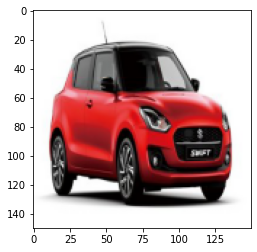

time: 53.7 s (started: 2021-06-16 11:42:16 +00:00)


In [ ]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')